## Подгрузка библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from utils.process_query import *
from utils.get_dynamic_query_list import *
from utils.config import levels

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from collections import defaultdict, deque
# from rapidfuzz import process, fuzz
# from flashtext import KeywordProcessor
# import re
# import nltk
# nltk.download('punkt_tab')
# nltk.downloader.download('vader_lexicon')
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

In [3]:
# data = pd.read_csv('data/bank_data.csv')
# data = data.fillna('None')
# data.head(1)

In [4]:
# # функция для построения иерархии
# def build_hierarchy(data, levels):
#     if len(levels) == 1:
#         # если уровни закончились, возвращаем уникальные значения
#         return data["driver_1"].unique().tolist()
    
#     current_level = levels[0]
#     hierarchy = {}
    
#     for group_name, group_data in data.groupby(current_level, sort=False):
#         hierarchy[group_name] = build_hierarchy(group_data, levels[1:])
    
#     return hierarchy

In [5]:
# from utils.config import levels

# hierarchy = build_hierarchy(data, levels)

# with open('data/bank_hierarchy.json', 'w') as f:
#     json.dump(hierarchy, f)
# hierarchy

In [6]:
with open('data/bank_hierarchy.json', 'r') as f:
    hierarchy = json.load(f)
    
# hierarchy

In [7]:
# samp_queries_list = ['Как дела по кредиты до востребования до востребования?',
#            'Как дела по кредитам до востребовния?',
#            'Нужна статистика по переводам юридическим лицам в каком-нидудь reTA.il по вкладам',
#            'Что там по офлайн поребкредитам в Corprate?',
#            'Выведи количество операций по ипотеке без господдержки',
#            'Какие планы по первичке вторичке по ипотке?',
#            'курс евро по рублю сегодня',
#            'Какие планы по самоинкассации?', # а в дереве 
#            'кушал сегодня?',
#            'Поможешь суммой по потребкредиты?',
#            'Во-первых, выведи мне SME кридиты с плавающей ставкой, во-вторых сумму вкладов длинных c плавающей ставкой в REtailе',
#            'Как тут у нас дела по ставке фиксированной до встребовния в sme?']

In [8]:
hierarchy['Corporate']['Кредиты']['None']['Агентские'] = {'Операции': ['Количество операций', 'Сумма, млн ₽'],
                                                          'Доверительные': ['Количество операций', 'Сумма, млн ₽']}
hierarchy['Corporate']['Кредиты']['Агентские обязательства'] = {'На год': {'С продлением': ['Количество операций', 'Сумма, млн ₽'],
                                                                           'Без продления': ['Количество операций', 'Сумма, млн ₽']},
                                                                'На три года': {'С продлением': ['Количество операций', 'Сумма, млн ₽'],
                                                                           'Без продления': ['Количество операций', 'Сумма, млн ₽']}}

In [9]:
hierarchy

{'Corporate': {'Вклады': {'None': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']}},
   'До востребования': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']}},
   'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количес

In [10]:
queries = {
    'Как дела по вкладам до востребовния?': ['Вклады', 'До востребования'],
    'Нужна статистика по переводам юридическим лицам в каком-нидудь reTA.il': ['Переводы юридическим лицам', 'Retail'],
    'Что там по офлайн поребкредитам в Corprate?': ['Офлайн', 'Потребкредиты', 'Corporate'],
    'Выведи количество опраций по ипотеке без господдрежки': ['Количество операций', 'Ипотека', 'Без господдержки'],
    'Какие планы по первичке, если рассматривать по ипотке, скажем, в разделе под названием sme?': ['Первичка', 'Ипотека', 'SME'],
    'курс евро по рублю сегодня': [],
    'Какие планы по самоинкассации?': [], # а в дереве 
    'кушал сегодня?': [],
    'Поможешь суммой по потребкредиты?': ['Сумма, млн ₽', 'Потребкредиты'],
    'А ну-ка, советничек наш дорогой, выведи мне SME вклады с плавающей ставкой, и, пожалуйста, побыстрее!!!': ['SME', 'Кредиты', 'Плавающая ставка'],
    'Как тут у нас дела по ставке фиксированной до встребовния в retail, если смотреть по количествк операций?': ['Фиксированная ставка', 'До востребования', 'Retail', 'Количество операций'],
    'Срочно отправь отчет по всему reatil!!': ['Retail'],
    'Скинь количество операций по срочным пж': ['Количество операций', 'Срочные'],
    'Дорогой друг, хотелось бы получить от теюя отчет по ставке плавающей в corporate, при условии что смотрим на длинные по сумме в млн рублях': ['Плавающая ставка', 'Corporate', 'Длинные', 'Сумма, млн ₽'],
    'Хей, бро, по переводам физическим лпцам внутри компании?': ['Переводы физическим лицам', 'Внутри компании'],
    'Выведи статистику по переводам юридическим лицам. Хотелось бы посмотреть именно на срочные платежи': ['Переводы юридическим лицам', 'Срочные'],
    'Потрбкредиты кинь.': ['потребкредиты'],
    'Значит, с господедржкой ипотеку, в кредитах в количесвте операций, будь добр. А, и еще в REtail.': ['С господдержкой', 'Кредиты', 'Количество операций', 'Retail'],
    'Можно, пожалуйста, посмотреть на количетво операций, межбанковских, по картам в разрезе переводов. Смотри по sme!': ['Количество операций', 'Межбанковские', 'По картам', 'Переводы', 'SME']
}

In [11]:
hierarchy

{'Corporate': {'Вклады': {'None': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']}},
   'До востребования': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']}},
   'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количес

## РАБОЧИЙ ВАРИАНТ

Пайплайн такой: сначала делаем как бы fit для иерархии, получаем список нормализованных терминов, а так же словарь из нормализованных терминов и соответствующим им значениям в исходной иерархии. Затем просто закидываем запрос в функцию, получаем прогноз.

In [12]:
all_terms, norm2keys = fit_hierarchy(hierarchy)

['короткие', 'без продления', 'до востребования', 'переводы физическим лицам', 'межфилиальные', 'срочные', 'рефинансирование', 'онлайн', 'офлайн', 'вторичка', 'фиксированная ставка', 'переводы юридическим лицам', 'внутри компании', 'операции', 'обычные', 'по картам', 'на три года', 'без господдержки', 'потребкредиты', 'новые', 'ипотека', 'на год', 'вклады', 'переводы', 'количество операций', 'длинные', 'retail', 'межбанковские', 'доверительные', 'с господдержкой', 'плавающая ставка', 'сумма млн ₽', 'первичка', 'none', 'агентские обязательства', 'corporate', 'по счетам', 'sme', 'кредиты', 'с продлением', 'агентские']
{'corporate': 'Corporate', 'retail': 'Retail', 'sme': 'SME', 'вклады': 'Вклады', 'кредиты': 'Кредиты', 'переводы': 'Переводы', 'none': 'None', 'до востребования': 'До востребования', 'срочные': 'Срочные', 'ипотека': 'Ипотека', 'потребкредиты': 'Потребкредиты', 'агентские обязательства': 'Агентские обязательства', 'переводы физическим лицам': 'Переводы физическим лицам', 'пе

In [13]:
hierarchy

{'Corporate': {'Вклады': {'None': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']}},
   'До востребования': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']}},
   'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количес

In [14]:
special_query_0 = 'Нужно быстрое резюме по агентским кредитам операциям, пожалуйста'
special_query_1 = 'Нужно быстрое по агентским кредитам операциям отчет, пожалуйстаа'
special_query_2 = 'Нужно быстрое резюме по агентским обязательствам в кредитах, пожалуйста'
special_query_3 = 'По агентским обязательствам нужно срочно увидеть сумму в млн рублях'

In [41]:
query = list(queries.keys())[2]
# query = special_query_0
print(query)
print('\nЛоги:\n', ':'*70, '\n')

processed_query = process_query(query, all_terms, norm2keys, hierarchy, levels, long_score_cutoff_first=65,
                                    long_score_cutoff_second=81, sim_threshold=60, sim_scorer=fuzz.WRatio)
print(':'*70, '\n\n', 'Финальный query для обработки:', processed_query)

Что там по офлайн поребкредитам в Corprate?

Логи:
 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

['что там по офлайн поребкредитам', 'там по офлайн поребкредитам в', 'по офлайн поребкредитам в corprate']
[('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
[('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
[('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
--- []
['что', 'там', 'по', 'офлайн', 'поребкредитам', 'в', 'corprate']
[]
[]
[]
[('офлайн', 100.0, 5), ('онлайн', 90.0, 4)]
[('потребкредиты', 91.7948717948718, 9)]
[]
[('corporate', 97.77777777777777, 20)]
--- ['онлайн', 'офлайн', 'corporate', 'потребкредиты']

CHOSEN TERMS: ['онлайн', 'офлайн', 'corporate', 'потребкредиты']
Ошибка: Неверный контекст запроса!
                   онлайн      офлайн  corporate  потребкредиты
онлайн         100.000000   83.333333        NaN            NaN
офлайн          83.333333  100.000000        NaN            NaN
corporate             NaN         NaN      100.0        

In [42]:
processed_query

{'segment': 'Corporate',
 'lvl_1': 'None',
 'lvl_2': 'Потребкредиты',
 'lvl_3': 'Офлайн',
 'lvl_4': 'None',
 'driver_1': 'None'}

---

Обработка входящего запроса:

In [ ]:
levels

['segment', 'lvl_1', 'lvl_2', 'lvl_3', 'lvl_4', 'driver_1']

In [43]:
queries_list = get_dynamic_query_list(hierarchy, processed_query, levels)
queries_list

[{'segment': 'Corporate',
  'lvl_1': 'Кредиты',
  'lvl_2': 'Потребкредиты',
  'lvl_3': 'Офлайн',
  'lvl_4': 'Рефинансирование',
  'driver_1': ['Количество операций', 'Сумма, млн ₽']},
 {'segment': 'Corporate',
  'lvl_1': 'Кредиты',
  'lvl_2': 'Потребкредиты',
  'lvl_3': 'Офлайн',
  'lvl_4': 'Новые',
  'driver_1': ['Количество операций', 'Сумма, млн ₽']},
 {'segment': 'Corporate',
  'lvl_1': 'Кредиты',
  'lvl_2': 'Потребкредиты',
  'lvl_3': 'Офлайн',
  'lvl_4': 'None',
  'driver_1': ['Количество операций', 'Сумма, млн ₽']}]

---

Резюме:

1. Предложение Семена: окно размером 5, находим индексы максимально метча, затем удаляем метч и продолжаем поиск по другим фразам. Если меньше - ничего не добавляем. Так окно движется дальше.
2. Думаю, нужно запоминать индексы, в которых получился максимальный мэтч. После первого прохода имеем приблизительный список возможных слов. В тех местах, где максимальный мэтч - проходимся второй раз, пытаемся смэтчить слова из полученного списка. Идея: нужно знать, какие слова В КЛЮЧАХ схожи.

---
2. Мое предположения предложения Семена: идем потом дальше, с окном 4. Составляем рейтинг мэтчей.
3. Контекстная матрица: с полученным запросом проверяем с помощью матрицы контекста правильность запроса. Если два слова из разного "контекста" (веток) - БАН
4. Более длинным метчам - приоритет
5. После того, как нашли слова, пытаемся вернуть на единственный запрос ИЛИИИИ сиблинги будут создавать список слов на каком-то левеле

---

## Семь разь протесть, один раз посчитай accuracy

In [60]:
accuracy_dct = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

for query, key_words in queries.items():
    processed_query = process_query(query, all_terms, norm2keys, hierarchy, levels, 
                                    # long_score_cutoff_first=75,
                                    # long_score_cutoff_second=85,
                                    long_score_cutoff_first=65,
                                    long_score_cutoff_second=81, 
                                    sim_threshold=80, 
                                    sim_scorer=fuzz.partial_token_set_ratio
                                    #long_scorer_second=fuzz.WRatio
                                    )
    
    if not key_words:
        accuracy_dct[0].append(int(processed_query is None))
        continue
    if not processed_query:
        accuracy_dct[len(key_words)].append(0)
        continue
    
    terms_selected = [q for q in processed_query.values() if q != 'None']
    terms_guessed = [t for t in terms_selected if t in key_words]
    accuracy_dct[len(key_words)].append(len(terms_guessed)/len(key_words))

print(accuracy_dct)

['как дела по вкладам до', 'дела по вкладам до востребовния']
[('до востребования', 100.0, 1), ('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
[('до востребования', 100.0, 1), ('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
Sub: [('до востребования', 96.7741935483871, 0)]
--- ['до востребования']
['как', 'дела', 'по', 'вкладам', 'до', 'востребовния']
[]
[]
[]
[('вклады', 90.95238095238095, 12)]
[]
[]
--- ['вклады']

CHOSEN TERMS: ['до востребования', 'вклады']

FINAL TERMS: ['до востребования', 'вклады']
['До востребования', 'Вклады']
['нужна статистика по переводам юридическим', 'статистика по переводам юридическим лицам', 'по переводам юридическим лицам в', 'переводам юридическим лицам в каком-нидудь', 'юридическим лицам в каком-нидудь retail']
[('переводы юридическим лицам', 100.0, 4), ('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
[('переводы физическим лицам', 100.0, 2), ('переводы юридическим лицам', 100.0, 4), ('по картам', 100.0, 6), ('по счетам', 100.0, 15)]
Sub: [('

In [54]:
hierarchy

{'Corporate': {'Вклады': {'None': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']}},
   'До востребования': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']}},
   'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количес

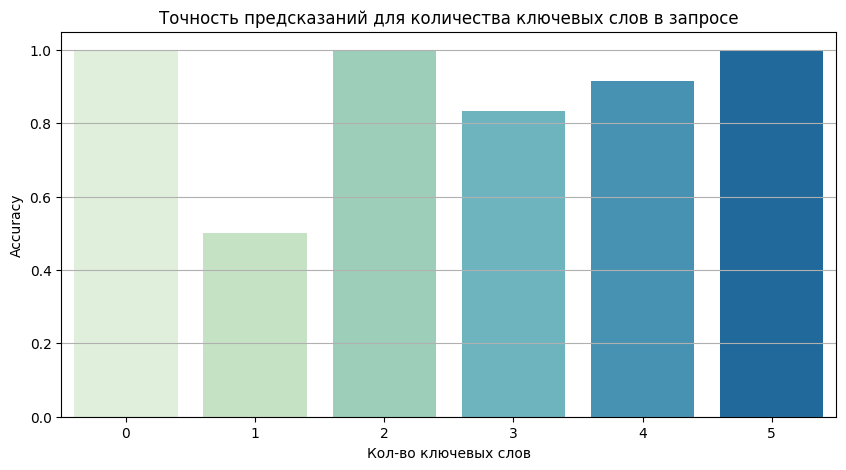

In [61]:
for i in accuracy_dct.keys():
    if accuracy_dct[i]:
        accuracy_dct[i] = np.mean(accuracy_dct[i])
    else:
        print(f'Warning: Не найдено значений для кол-ва ключей {i}')
        accuracy_dct[i] = 0

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(accuracy_dct, palette='GnBu')
plt.title('Точность предсказаний для количества ключевых слов в запросе')
plt.ylabel('Accuracy')
plt.xlabel('Кол-во ключевых слов');

In [ ]:
0/0

ZeroDivisionError: division by zero

# Дальше - тестовые варианты, прошлые эксперименты

In [ ]:
# # нормализуем строку
# def norm(s: str) -> str:
#     s = re.sub(r'/s+', ' ', s.strip().lower())

#     punc_list = ['.', ',', '!', ':', '?', '/']

#     for p in punc_list:
#         s = s.replace(p, '')
#     return s

# class Node:
#     __slots__ = ("id", "parent", "depth", "label", "payload")
    
#     def __init__(self, id, parent, depth, label, payload=None):
#         self.id=id; 
#         self.parent=parent; 
#         self.depth=depth; 
#         self.label=label; 
#         self.payload=payload

# def add_term(term2nodes, canonical, synonyms, node_id, kp):
#         c = norm(canonical)
#         term2nodes[c].add(node_id)
#         # добавляем синонимы/аббревиатуры в KeywordProcessor
#         for s in synonyms:
#             kp.add_keyword(norm(s), c)

# # функция получения синонимов   
# def get_synonyms(key):
#         return [p.strip() for p in key.split(';') if p.strip()]
    
# def build_index(tree):
#     all_terms = set()
#     norm2keys = {}
#     queue = deque([(k, tree) for k in tree.keys()])
    
#     while queue:
#         key, sub_tree = queue.popleft()
        
#         if isinstance(sub_tree, dict):            
#             norm_key = norm(key)
#             all_terms.add(norm_key)
#             norm2keys[norm_key] = key
#             sub_tree = sub_tree[key]
            
#             if isinstance(sub_tree, list):
#                 for val in sub_tree:
#                     norm_val = norm(val)
#                     all_terms.add(norm_val)
#                     norm2keys[norm_val] = val
#             else:
#                 queue += [(k, sub_tree) for k in sub_tree.keys()]           
#         else:
#             raise ValueError('Неправильный формат JSON!')
        
#     return list(all_terms), norm2keys
# def build_index(tree):
#     nodes = []
#     term2nodes = defaultdict(set)
#     sibling_groups = defaultdict(set)
#     kp = KeywordProcessor(case_sensitive=False)

#     node_id = -1
#     queue = deque([(-1, -1, tree, "<ROOT>")])  # parent=-1 это виртуальный корень

#     while queue:
#         parent, depth, obj, label = queue.popleft()

#         # создаём ноду
#         cur_id = node_id
#         n = Node(cur_id, parent, depth, label)
#         nodes.append(n)
#         node_id += 1

#         # индексируем label всегда (ключ)
#         add_term(term2nodes, label, get_synonyms(label), cur_id, kp)

#         if isinstance(obj, dict):
#             # дети-ключи
#             for k, v in obj.items():
#                 sibling_groups[cur_id].add(norm(k))
#                 queue.append((cur_id, depth + 1, v, k))

#         elif isinstance(obj, list):
#             # список драйверов: каждый элемент = ребёнок
#             for v in obj:
#                 sibling_groups[cur_id].add(norm(str(v)))
#                 queue.append((cur_id, depth + 1, v, str(v)))

#         else:
#             # скалярное значение (лист)
#             add_term(term2nodes, str(obj), get_synonyms(str(obj)), cur_id, kp)

#     return nodes, term2nodes, sibling_groups, kp

In [ ]:
# если контекст понадобится на том же уровне
# def update_context_matrix(values_df, hierarchy, parent='<root>'):
#     if isinstance(hierarchy, dict):
#         keys_list = [norm(key) for key in hierarchy.keys()]
        
#         try:
#             values_df.loc[keys_list, keys_list] = 1
#             # превращаем значения словаря hierarchy из типа values в их исходный тип
#             hierarchy_values = list(hierarchy.values())[0]
#             print(hierarchy_values)
#             if isinstance(hierarchy_values, dict):
#                 keys_list = [norm(key) for key in hierarchy_values.keys()]
#                 keys_list.append(parent)
#                 values_df.loc[keys_list, keys_list] = 1
                
#                 for key in hierarchy.keys():
#                     print('KEEEEEEEEEEY:', key, '\n\n')
#                     update_context_matrix(values_df, hierarchy[key], parent=norm(key))
#             elif isinstance(hierarchy_values, list):
#                 keys_list = [norm(val) for val in hierarchy_values]
#                 keys_list.append(parent)
#                 values_df.loc[keys_list, keys_list] = 1
                
#         except Exception:
#             raise KeyError(f'В таблице значения нет одного из значений {keys_list}')
        
        
        

In [ ]:
# def fit_hierarchy(hierarchy):
#     nodes, term_dict, siblings_dict, kp = build_index(hierarchy)
#     all_terms = list(term_dict.keys())
#     print(all_terms)
#     print(term_dict)
#     print(siblings_dict)
#     return all_terms, nodes, term_dict, siblings_dict, kp

# def fit_hierarchy(hierarchy):
#     all_terms, norm2keys = build_index(hierarchy)
#     print(all_terms)
#     print(norm2keys)
#     return all_terms, norm2keys

In [ ]:
all_terms, norm2keys = fit_hierarchy(hierarchy)

['межбанковские', 'по картам', 'переводы юридическим лицам', 'с господдержкой', 'none', 'по счетам', 'фиксированная ставка', 'новые', 'офлайн', 'ипотека', 'первичка', 'до востребования', 'без господдержки', 'длинные', 'sme', 'сумма млн ₽', 'срочные', 'переводы', 'внутри компании', 'вторичка', 'количество операций', 'retail', 'потребкредиты', 'рефинансирование', 'переводы физическим лицам', 'обычные', 'межфилиальные', 'вклады', 'плавающая ставка', 'короткие', 'corporate', 'онлайн', 'кредиты']
{'corporate': 'Corporate', 'retail': 'Retail', 'sme': 'SME', 'вклады': 'Вклады', 'кредиты': 'Кредиты', 'переводы': 'Переводы', 'none': 'None', 'до востребования': 'До востребования', 'срочные': 'Срочные', 'ипотека': 'Ипотека', 'потребкредиты': 'Потребкредиты', 'переводы физическим лицам': 'Переводы физическим лицам', 'переводы юридическим лицам': 'Переводы юридическим лицам', 'плавающая ставка': 'Плавающая ставка', 'фиксированная ставка': 'Фиксированная ставка', 'вторичка': 'Вторичка', 'первичка': 

In [ ]:
query = queries[-1]
print(query)

long_terms = [term for term in all_terms if len(term.split()) > 1]
short_terms = [term for term in all_terms if len(term.split()) == 1]

long_terms = long_fuzzy_match(query, long_terms, score_cutoff_wratio=70, score_cutoff_dl=81)
print('---', long_terms)

short_terms = short_fuzzy_match(query, short_terms, score_cutoff=90)
print('---', short_terms)

final_terms = long_terms + short_terms
print('\nFINAL TERMS:', final_terms)

Как тут у нас дела по ставке фиксированной до встребовния в sme?
['как тут у нас дела', 'тут у нас дела по', 'у нас дела по ставке', 'нас дела по ставке фиксированной', 'дела по ставке фиксированной до', 'по ставке фиксированной до встребовния', 'ставке фиксированной до встребовния в', 'фиксированной до встребовния в sme']
[]
[('по картам', 100.0, 0), ('по счетам', 100.0, 3)]
[('по картам', 100.0, 0), ('по счетам', 100.0, 3)]
[('по картам', 100.0, 0), ('по счетам', 100.0, 3), ('фиксированная ставка', 85.0, 4)]
Sub: [('фиксированная ставка', 85.0, 2)]
[('по картам', 100.0, 0), ('по счетам', 100.0, 3), ('до востребования', 100.0, 5), ('фиксированная ставка', 85.0, 4)]
Sub: [('фиксированная ставка', 85.0, 3)]
[('по картам', 100.0, 0), ('по счетам', 100.0, 3), ('до востребования', 100.0, 5), ('фиксированная ставка', 85.0, 4)]
Sub: [('фиксированная ставка', 85.0, 3)]
Sub: [('до востребования', 93.33333333333333, 2)]
[('до востребования', 100.0, 5), ('фиксированная ставка', 85.0, 4)]
Sub: [(

In [ ]:
json_values_df = pd.DataFrame(np.zeros((len(all_terms), len(all_terms))), index=all_terms, columns=all_terms)
update_context_matrix(json_values_df, hierarchy)
json_values_df

,межбанковские,по картам,переводы юридическим лицам,с господдержкой,none,по счетам,фиксированная ставка,новые,офлайн,ипотека,...,рефинансирование,переводы физическим лицам,обычные,межфилиальные,вклады,плавающая ставка,короткие,corporate,онлайн,кредиты
межбанковские,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
по картам,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
переводы юридическим лицам,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
с господдержкой,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
none,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
по счетам,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
фиксированная ставка,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
новые,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
офлайн,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
ипотека,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
check_context_compatibility(json_values_df, final_terms)

True

In [ ]:
# def pick_best_path(matched_terms, nodes, term2nodes, sibling_groups):
#     # скорим узлы: глубже + длиннее фраза важнее
#     depth_weight = 0.2
#     term_len_weight = 0.15
#     term_len = {t: len(t.split()) for t in matched_terms}

#     scores = defaultdict(float)
#     node_labels = {n.id: norm(n.label) for n in nodes}

#     for t in matched_terms:
#         for nid in term2nodes.get(t, []):
#             depth = nodes[nid].depth
#             scores[nid] += depth_weight*depth + term_len_weight*term_len[t]

#     # конфликт-резолвер: если у одного parent два разных ребёнка сматчились, оставляем больший скор
#     by_parent = defaultdict(list)
#     for nid, sc in scores.items():
#         pid = nodes[nid].parent
#         by_parent[pid].append((nid, sc))

#     to_drop = set()
    
#     for pid, arr in by_parent.items():
#         if pid is None: 
#             continue
#         sibset = sibling_groups.get(pid, set())
#         # какие дети этого parent были задействованы?
#         hit = defaultdict(list)
#         for nid, sc in arr:
#             lab = node_labels[nid]
#             if lab in sibset:
#                 hit[lab].append((nid, sc))
#             print(hit)
#         if len(hit) > 1:
#             # оставляем только ребёнка с суммарно большим скором
#             best_lab, best_sum = None, -1
#             for lab, items in hit.items():
#                 s = sum(sc for _, sc in items)
#                 if s > best_sum:
#                     best_sum, best_lab = s, lab
#             for lab, items in hit.items():
#                 if lab != best_lab:
#                     to_drop.update(nid for nid, _ in items)

#     for d in to_drop:
#         scores.pop(d, None)

#     if not scores:
#         return None

#     # берём максимальный скор
#     best_node = max(scores.items(), key=lambda kv: kv[1])[0]
#     # подняться к корню
#     path = []
#     cur = best_node
#     while cur is not None:
#         path.append(nodes[cur].label)
#         cur = nodes[cur].parent
#     path = list(reversed(path))
#     return path, best_node

# def build_levels(path, max_depth=6):
#     out = {}
#     for i in range(max_depth):
#         out[f"lvl_{i}"] = path[i] if i < len(path) else "None"
        
#     return out

In [ ]:
# def transform_hierarchy(query, all_terms, nodes, term_dict, siblings_dict, kp):
#     # primary = longest_phrase_match(query, kp)
#     # print('Primary:', primary)
#     # если длинного метча не нашлось - пробуем разбить запрос по словам
    
#     rapid_tokens = re.findall(r"\w+", norm(query))
    
#     if len(rapid_tokens) < 5:
#         print('-'*30, '\n')
#         print('FIRST PRIMARYS:')
#         primarys = mine_fuzzy_match(rapid_tokens, all_terms, score_cutoff=83)
#         print('-'*30, '\n')
#         print(primarys)
#         print('-'*30, '\n')
    
#         secondary_rapid_tokens = []
#         for i in range(len(rapid_tokens)-1):
#             secondary_rapid_tokens.append(' '.join([rapid_tokens[i], rapid_tokens[i+1]]))
#         print('-'*30, '\n')
#         print('SECOND PRIMARYS:')
#         primarys_2 = mine_fuzzy_match(secondary_rapid_tokens, all_terms, score_cutoff=73)
#         print('-'*30)
#         print(primarys_2)
        
#     else:
#         print('-'*30, '\n')
#         print('FIRST LONG PRIMARYS:')
#         long_token = get_query_token(rapid_tokens, window=5)
#         primarys = mine_fuzzy_match(long_token, all_terms, score_cutoff=73)
        
#         print('-'*30, '\n')
#         print(primarys)
#         print('-'*30, '\n')
    
    
#     print('-'*30, '\n')
        
#     # result = pick_best_path(primary, nodes, term_dict, siblings_dict)

#     # if result is None:
#     #     answer = {f"lvl_{i}": 'None' for i in range(6)}
#     # else:
#     #     path, best_node = result
#     #     answer = build_levels(path, max_depth=6)
        
#     # return answer

## NLP

In [ ]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# from gensim.models import fasttext
# import gensim
# from natasha import MorphVocab, Doc, Segmenter, NewsEmbedding, NewsMorphTagger

In [ ]:
# ft_model = fasttext.load_facebook_model("cc.ru.300.bin")

# def get_semantic_similarity(query, term):
#     q_vec = ft_model.get_sentence_vector(query)
#     t_vec = ft_model.get_sentence_vector(term)
#     return np.dot(q_vec, t_vec)/(np.linalg.norm(q_vec) * np.linalg.norm(t_vec))

# similarity = get_semantic_similarity("гарантии", "банковские гарантии")  

In [ ]:
# segmenter = Segmenter()
# embedding = NewsEmbedding()
# morph_tagger = NewsMorphTagger(embedding)
# morph_vocab = MorphVocab()

# doc = Doc(queries[0])
# doc.segment(segmenter)
# doc.tag_morph(morph_tagger)
# doc.tokens

# for token in doc.tokens:
#     token.lemmatize(morph_vocab)

# tokens = [token.lemma for token in doc.tokens]
# tokens


In [ ]:
# word_tokenize(queries[0], language="russian")

In [ ]:
# def jaro_winkler_distance(s1: str, s2: str, p=0.1):
#     m = 0
#     t = 0
#     l = 0
#     s1_len = len(s1)
#     s2_len = len(s2)
#     d_j = 0
    
#     if s1_len == 0 or s2_len == 0:
#         return 0
    
#     if s1_len >= s2_len:
#         max_len = s1_len
#     else:
#         max_len = s2_len
#         s1, s2 = s2, s1
    
#     threshold = int(max_len/2) - 1
#     already_used_idx = []
    
    
#     for i in range(max_len):
#         j = s2.find(s1[i])

#         if j != -1 and j not in already_used_idx and abs(i - j) <= threshold:
#             if i != j:
#                 t += 1                
#             m += 1
#             already_used_idx.append(j)
#     # рассчитываем расстояние Джаро
#     for c1, c2 in zip(s1, s2):
#         if c1 == c2:
#             l += 1
#         else:
#             break
#         if l == 4:
#             break
#     d_j = 1/3*(m/s1_len + m/s2_len + (m-t/2)/m)
#     # возвращаем расстояние Джаро-Винклера
#     return d_j + l * p * (1-d_j)

# def jaro_winkler_scorer(s1, s2, score_cutoff = 0):
#     d = jaro_winkler_distance(s1, s2)
#     max_len = max(len(s1), len(s2))

#     score = d
    
#     if score_cutoff and score < score_cutoff:
#         score = 0
    
#     return score

In [ ]:
# print(jaro_winkler_distance("martha", "martha"))
# print(jaro_winkler_distance("кредиты", "кредитам"))
# print(jaro_winkler_distance("гарантии", "банковские гарантии"))

In [ ]:
print(jaro_winkler_scorer("до востребования", "до востребовния"))
print(jaro_winkler_scorer("до востребования", "по всnребовния"))
print(damerau_levenshtein_scorer("до востребования", "по всnребовния"))

98.75
79.96031746031746
75.0


In [ ]:
print(damerau_levenshtein_scorer("martha", "martha"))  # ≈ 0.9611
print(damerau_levenshtein_scorer("кредиты", "кредитам"))   # ≈ 0.84
print(damerau_levenshtein_scorer("гарантии", "банковские гарантии")) # ≈ 0.8133

100.0
75.0
42.10526315789473


In [ ]:
fuzz.WRatio("гарантии", "банковие гарантии")

90.0

In [ ]:
jaro_winkler_scorer('banan', 'banan')

100.0

In [ ]:
# def build_index(tree):
#     nodes = []
#     term2nodes = defaultdict(set)
#     sibling_groups = defaultdict(set)
#     kp = KeywordProcessor(case_sensitive=False)

#     node_id = 0
#     queue = deque([(None, -1, tree, "<ROOT>")])

#     while queue:
#         parent, depth, obj, label = queue.popleft()
        
#         if depth == -1:            
#             if not isinstance(obj, dict):
#                 raise ValueError('Неправильный изначальный JSON!')
            
#             for k, v in obj.items():
#                 sibling_groups[node_id].add(norm(k))
#                 queue.append((None, depth+1, v, k))

#             continue
        
#         n = Node(node_id, parent, depth, label)
#         nodes.append(n)
#         cur_id = node_id
#         node_id += 1

#         if isinstance(obj, dict):
#             # индексируем текущий label как фразу
#             add_term(term2nodes, label, get_synonyms(label), cur_id, kp)
            
#             for k, v in obj.items():
#                 # для конфликтов: дети одного родителя считаем взаимоисключающими (по умолчанию)
#                 sibling_groups[cur_id].add(norm(k))
#                 queue.append((cur_id, depth+1, v, k))

#         elif isinstance(obj, list):
#             # дошли до списка драйверов
#             for v in obj:
#                 queue.append((cur_id, depth+1, v, v))
                
#         else:
#             # скалярные листья (строки)
#             add_term(term2nodes, label, get_synonyms(label), cur_id, kp)
#     return nodes, term2nodes, sibling_groups, kp

# # мэтчинг самой длинной фразы
# def longest_phrase_match(query, kp):
#     # создаем коллекцию канонических фраз без перекрытий
#     matches = kp.extract_keywords(norm(query), span_info=True)
#     # оставим максимальные по длине
#     matches.sort(key=lambda m: (m[2]-m[1]), reverse=True)
#     chosen, used = [], []
#     for canon, start, end in matches:
#         if all(not (start < u_end and end > u_start) for (u_start, u_end) in used):
#             chosen.append(canon)
#             used.append((start, end))
#     return list(set(chosen))
# from rapidfuzz import process, fuzz

# # поиск слов, которые не смэтчили
# def fuzzy_match(tokens, candidate_terms, limit=5, score_cutoff=85):
#     found = set()
#     for t in tokens:
#         best = process.extract(t, candidate_terms, scorer=fuzz.WRatio, limit=limit, score_cutoff=score_cutoff)
#         print(best)
#         if best:
#             cand, score, _ = best[0]
#             found.add((cand, score))
#     return list(found)

# выбор узла и сборка ответа

In [ ]:
# fuzz.WRatio('как дела ну по агентским', 'ипотека')

In [ ]:
# fuzz.WRatio('как дела ну по агентским', 'агентские')

In [ ]:
# fuzz.WRatio('как дела ну по агентским', 'агентские выписки банка')

In [ ]:
# fuzz.WRatio('дела ну по агентским выпискам', 'агентские')

In [ ]:
# fuzz.WRatio('дела ну по агентским выпискам', 'агентские выписки банка')

In [ ]:
fuzz.WRatio('ну по агентским выпискам бпнка', 'агентские выписки банка')

75.47169811320755

In [ ]:
fuzz.WRatio('вкладах', 'вклады')

76.92307692307692

In [ ]:
fuzz.WRatio('ну по агентским выпискам банка', 'агентские')

80.47058823529412

---

In [ ]:
fuzz.WRatio('агентским выпискам бпнка', 'агентские выписки банка')

85.1063829787234

In [ ]:
damerau_levenshtein_scorer('по', 'ипотека')

28.57142857142857

In [ ]:
damerau_levenshtein_scorer('по встребованиям', 'по востребованию')

81.25

In [ ]:
damerau_levenshtein_scorer('по', 'потребкредиты')

15.384615384615385

In [ ]:
damerau_levenshtein_scorer('гарантии', 'банковские гарантии')

42.10526315789473

In [ ]:
jaro_winkler_scorer('гарантии', 'гарантии банковские')

88.42105263157895

In [ ]:
fuzz.WRatio('гарантии', 'банковские гарантии')

90.0

In [ ]:
damerau_levenshtein_scorer('гарантии', 'банковские гарантии')

42.10526315789473

---

Резюме:

1. Предложение Семена: окно размером 5, находим индексы максимально метча, затем удаляем метч и продолжаем поиск по другим фразам. Если меньше - ничего не добавляем. Так окно движется дальше.
2. Думаю, нужно запоминать индексы, в которых получился максимальный мэтч. После первого прохода имеем приблизительный список возможных слов. В тех местах, где максимальный мэтч - проходимся второй раз, пытаемся смэтчить слова из полученного списка. Идея: нужно знать, какие слова В КЛЮЧАХ схожи.

---
2. Мое предположения предложения Семена: идем потом дальше, с окном 4. Составляем рейтинг мэтчей.
3. Контекстная матрица: с полученным запросом проверяем с помощью матрицы контекста правильность запроса. Если два слова из разного "контекста" (веток) - БАН
4. Более длинным метчам - приоритет
5. После того, как нашли слова, пытаемся вернуть на единственный запрос ИЛИИИИ сиблинги будут создавать список слов на каком-то левеле

---

In [ ]:
# jaro_winkler_scorer('ну по агентским выпискам бпнка', 'агентские выписки банка')

## Задача

In [ ]:
def get_query_token(query_terms, window=2):
    doc = []
    for i in range(len(query_terms)-window+1):
        token = query_terms[i]
        for j in range(1, window):
            token = ' '.join([token, query_terms[i+j]])
        doc.append(token)
    return doc



def mine_fuzzy_wuzzy(query, candidate_terms, window=5, limit=5, score_cutoff_wratio=70, score_cutoff_dl=70):
    query = norm(query)
    query_windows = get_query_token(query.split(), window)
    print(query_windows)
    key_words = set()
    
    for i in range(len(query_windows)):
        matches = process.extract(query_windows[i], 
                                  candidate_terms, 
                                  scorer=fuzz.WRatio,
                                  score_cutoff=score_cutoff_wratio, 
                                  limit=limit)
        print(matches)
        
        if matches:
            matches_list = [m[0] for m in matches]
            sub_query_windows = get_query_token(query_windows[i].split(), max(len(m[0].split()) for m in matches))
            print(sub_query_windows)
            variant_dct = {}
            best_score = -1
            best_word = None
            
            for j in range(len(sub_query_windows)):
                sub_matches = process.extract(sub_query_windows[j], 
                                        matches_list, 
                                        scorer=fuzz.WRatio,
                                        score_cutoff=score_cutoff_dl, 
                                        limit=limit)
                if sub_matches:
                    print('Sub:', sub_matches)
                    key_words.update([m[0] for m in sub_matches])
                    
    return list(key_words)




In [ ]:
query = queries[4]
print(query)

mine_fuzzy_wuzzy(query, all_terms, score_cutoff_wratio=60, score_cutoff_dl = 80)

Выведи количество операций по ипотеке без господдержки
['выведи количество операций по ипотеке', 'количество операций по ипотеке без', 'операций по ипотеке без господдержки']
[('количество операций', 90.0, 20), ('по картам', 85.5, 1), ('по счетам', 85.5, 5), ('ипотека', 77.14285714285715, 9), ('новые', 60.00000000000001, 7)]
['выведи количество', 'количество операций', 'операций по', 'по ипотеке']
Sub: [('количество операций', 100.0, 0)]
Sub: [('количество операций', 85.5, 0)]
[('количество операций', 90.0, 20), ('по картам', 85.5, 1), ('по счетам', 85.5, 5), ('без господдержки', 85.5, 12), ('ипотека', 77.14285714285715, 9)]
['количество операций', 'операций по', 'по ипотеке', 'ипотеке без']
Sub: [('количество операций', 100.0, 0)]
Sub: [('количество операций', 85.5, 0)]
Sub: [('ипотека', 83.07692307692308, 4)]
[('без господдержки', 90.0, 12), ('по картам', 85.5, 1), ('по счетам', 85.5, 5), ('количество операций', 85.5, 20), ('с господдержкой', 77.14285714285715, 3)]
['операций по', 'п

['ипотека', 'количество операций', 'без господдержки']

In [ ]:
hierarchy

{'Corporate': {'Вклады': {'None': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']}},
   'До востребования': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']}},
   'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количес

In [ ]:
from rapidfuzz.distance.DamerauLevenshtein import normalized_similarity

In [ ]:
normalized_similarity('a', 'a')

1.0

In [ ]:
def fuzzy_match(tokens, candidate_terms, window=5, limit=5, score_cutoff=85):
    found = []
    max_len = max(len(term) for term in candidate_terms)  # максимальная длина термина в словах
    
    # Проверяем все возможные n-граммы токенов
    for n in range(1, max_len + 1):
        for start_idx in range(len(tokens) - n + 1):
            # Формируем n-грамму из токенов
            ngram = ' '.join(tokens[start_idx:start_idx + window])
            
            # Ищем совпадения для n-граммы
            matches = process.extract(
                ngram, 
                candidate_terms, 
                scorer=fuzz.WRatio, 
                limit=limit, 
                score_cutoff=score_cutoff,
            )
            
            
            
            for match in matches:
                cand, score, _ = match
                found.append({
                    'term': cand,
                    'score': score,
                    'start': start_idx,
                    'end': start_idx + n - 1  # конечный индекс включительно
                })
    
    return found

In [ ]:
def fit_hierarchy(hierarchy):
    nodes, term_dict, siblings_dict, kp = build_index(hierarchy)
    all_terms = list(term_dict.keys())
    print(all_terms)
    print(term_dict)
    print(siblings_dict)
    return all_terms, nodes, term_dict, siblings_dict, kp
    
def transform_hierarchy(query, all_terms, nodes, term_dict, siblings_dict, kp):
    # primary = longest_phrase_match(query, kp)
    # print('Primary:', primary)
    # если длинного метча не нашлось - пробуем разбить запрос по словам
    
    rapid_tokens = re.findall(r"\w+", norm(query))
    
    if len(rapid_tokens) < 5:
        print('-'*30, '\n')
        print('FIRST PRIMARYS:')
        primarys = fuzzy_match(rapid_tokens, all_terms, score_cutoff=83)
        print('-'*30, '\n')
        print(primarys)
        print('-'*30, '\n')
    
        secondary_rapid_tokens = []
        for i in range(len(rapid_tokens)-1):
            secondary_rapid_tokens.append(' '.join([rapid_tokens[i], rapid_tokens[i+1]]))
        print('-'*30, '\n')
        print('SECOND PRIMARYS:')
        primarys_2 = fuzzy_match(secondary_rapid_tokens, all_terms, score_cutoff=73)
        print('-'*30)
        print(primarys_2)
        
    else:
        print('-'*30, '\n')
        print('FIRST LONG PRIMARYS:')
        long_token = get_query_token(rapid_tokens, window=5)
        primarys = fuzzy_match(long_token, all_terms, score_cutoff=73)
        
        print('-'*30, '\n')
        print(primarys)
        print('-'*30, '\n')
    
    
    print('-'*30, '\n')
        
    # result = pick_best_path(primary, nodes, term_dict, siblings_dict)

    # if result is None:
    #     answer = {f"lvl_{i}": 'None' for i in range(6)}
    # else:
    #     path, best_node = result
    #     answer = build_levels(path, max_depth=6)
        
    # return answer

In [ ]:
hierarchy

{'Corporate': {'Вклады': {'None': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']}},
   'До востребования': {'None': {'None': ['Количество операций',
      'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']}},
   'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']},
    'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количество операций', 'Сумма, млн ₽']},
    'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'],
     'Длинные': ['Количество операций', 'Сумма, млн ₽'],
     'Короткие': ['Количес

In [ ]:
queries

['Как дела по кредиты до востребования до востребования?',
 'Как дела по кредитам до востребовния?',
 'Нужна статистика по переводам юридическим лицам в каком-нидудь reTA.il по вкладам',
 'Что там по офлайн поребкредитам в Corprate?',
 'Выведи количество операций по ипотеке без господдержки',
 'Какие планы по первичке вторичке по ипотке?',
 'курс евро по рублю сегодня',
 'Какие планы по самоинкассации?',
 'кушал сегодня?',
 'Поможешь суммой по потребкредиты?',
 'Во-первых, выведи мне SME кридиты с плавающей ставкой, во-вторых сумму вкладов длинных c плавающей ставкой в REtailе',
 'Как тут у нас дела по ставке фиксированной до встребовния в sme?']

In [ ]:
query = queries[0]
print(query)

all_terms, nodes, term_dict, siblings_dict, kp = fit_hierarchy(hierarchy)
answer = transform_hierarchy(query, all_terms, nodes, term_dict, siblings_dict, kp)
print(answer)

Как дела по кредиты до востребования до востребования?


ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
json_values_df = pd.DataFrame(np.zeros((len(all_terms), len(all_terms))), index=all_terms, columns=all_terms)
json_values_df

,<root>,corporate,retail,sme,вклады,кредиты,переводы,none,до востребования,срочные,...,короткие,без господдержки,с господдержкой,новые,рефинансирование,по картам,по счетам,обычные,количество операций,"сумма, млн ₽"
<root>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corporate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
retail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
вклады,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
кредиты,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
переводы,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
до востребования,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
срочные,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
json_values_df.shape

(34, 34)

In [ ]:
def update_context_matrix(values_df, hierarchy, parent='<root>'):
    if isinstance(hierarchy, dict):
        keys_list = [norm(key) for key in hierarchy.keys()]
        
        try:
            values_df.loc[keys_list, keys_list] = 1
            
            hierarchy_values = list(hierarchy.values())[0]
            print(hierarchy_values)
            if isinstance(hierarchy_values, dict):
                keys_list = [norm(key) for key in hierarchy_values.keys()]
                keys_list.append(parent)
                values_df.loc[keys_list, keys_list] = 1
                
                for key in hierarchy.keys():
                    print('KEEEEEEEEEEY:', key, '\n\n')
                    update_context_matrix(values_df, hierarchy[key], parent=norm(key))
            elif isinstance(hierarchy_values, list):
                keys_list = [norm(val) for val in hierarchy_values]
                keys_list.append(parent)
                values_df.loc[keys_list, keys_list] = 1
                
        except Exception:
            raise KeyError(f'В таблице значения нет одного из значений {keys_list}')
        
        
        

In [ ]:
update_context_matrix(json_values_df, hierarchy)

{'Вклады': {'None': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']}}, 'До востребования': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']}, 'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'], 'Длинные': ['Количество операций', 'Сумма, млн ₽'], 'Короткие': ['Количество операций', 'Сумма, млн ₽']}, 'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'], 'Длинные': ['Количество операций', 'Сумма, млн ₽'], 'Короткие': ['Количество операций', 'Сумма, млн ₽']}}, 'Срочные': {'None': {'None': ['Количество операций', 'Сумма, млн ₽']}, 'Плавающая ставка': {'None': ['Количество операций', 'Сумма, млн ₽'], 'Длинные': ['Количество операций', 'Сумма, млн ₽'], 'Короткие': ['Количество операций', 'Сумма, млн ₽']}, 'Фиксированная ставка': {'None': ['Количество операций', 'Сумма, млн ₽'], 'Длинные': ['Количество операций', 'Сумма, млн ₽'], 'Короткие': ['Количество операций', 'Сумма, млн ₽']}}}, 'Кредиты': {'None': {'None': {'None': ['Количество оп

Резюме:

1. Предложение Семена: окно размером 5, находим индексы максимально метча, затем удаляем метч и продолжаем поиск по другим фразам. Если меньше - ничего не добавляем. Так окно движется дальше.
2. Думаю, нужно запоминать индексы, в которых получился максимальный мэтч. После первого прохода имеем приблизительный список возможных слов. В тех местах, где максимальный мэтч - проходимся второй раз, пытаемся смэтчить слова из полученного списка. Идея: нужно знать, какие слова В КЛЮЧАХ схожи.

---
2. Мое предположения предложения Семена: идем потом дальше, с окном 4. Составляем рейтинг мэтчей.
3. Контекстная матрица: с полученным запросом проверяем с помощью матрицы контекста правильность запроса. Если два слова из разного "контекста" (веток) - БАН
4. Более длинным метчам - приоритет
5. После того, как нашли слова, пытаемся вернуть на единственный запрос ИЛИИИИ сиблинги будут создавать список слов на каком-то левеле

In [ ]:
json_values_df

,<root>,corporate,retail,sme,вклады,кредиты,переводы,none,none,до востребования,...,короткие,без господдержки,с господдержкой,новые,рефинансирование,по картам,по счетам,обычные,количество операций,"сумма, млн ₽"
<root>,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corporate,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
retail,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sme,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
вклады,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
кредиты,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
переводы,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
none,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
до востребования,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
срочные,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Работа с таблицей

In [ ]:
# def get_json_values(hierarchy, values=set()):
#     if not isinstance(hierarchy, dict):
#         values.add(hierarchy)
#         return values
    
#     values.update(hierarchy.keys())
    
#     for key in hierarchy.keys():
#         values.update(get_json_values(hierarchy[key], values))
        
#     return values

In [ ]:
# bank_hierarchy = {
#   "банковская деятельность; банковский сектор": {
#     "кредитование; выдача займов": {
#       "None": {
#         "ипотека; жилищный кредит": {
#           "ипотека для физлиц; ФЛ": {
#             "банковские гарантии; гарантия платежа": {
#               "None": {
#                 "оценка залога; экспертиза имущества": "страхование имущества"
#               }
#             },
#             "субсидированные ипотечные программы": {
#               "льготная ставка; процентная льгота": {
#                 "None": {
#                   "госпрограмма поддержки; государственное субсидирование": "рефинансирование ипотеки"
#                 }
#               }
#             }
#           },
#           "ипотека для юрлиц; организации": {
#             "None": {
#               "строительные кредиты; финансирование застройщиков": {
#                 "гарантии исполнения обязательств": {
#                   "None": {
#                     "страхование ответственности": "проектное финансирование"
#                   }
#                 }
#               }
#             }
#           }
#         }
#       },
#       "потребительские кредиты; кредит наличными": {
#         "кредитные карты; карты рассрочки": {
#           "None": {
#             "лимит кредитования; доступный кредит": {
#               "None": {
#                 "программа лояльности; бонусные баллы": "кэшбэк"
#               }
#             }
#           }
#         },
#         "автокредитование": {
#           "страхование КАСКО; полное покрытие": {
#             "залог транспортного средства": {
#               "None": {
#                 "гарантии банка": "рефинансирование автокредита"
#               }
#             }
#           }
#         }
#       }
#     },
#     "депозитные операции; привлечение вкладов": {
#       "None": {
#         "вклады до востребования": {
#           "банковский счет; расчетный счет": {
#             "карточные счета": {
#               "дебетовые карты": {
#                 "None": {
#                   "банкомат; ATM": "POS-терминал"
#                 }
#               }
#             }
#           }
#         }
#       },
#       "срочные вклады": {
#         "процентная ставка; ставка вознаграждения": {
#           "None": {
#             "капитализация процентов": {
#               "None": {
#                 "досрочное снятие": "штраф за расторжение"
#               }
#             }
#           }
#         }
#       }
#     },
#     "расчетно-кассовое обслуживание; РКО": {
#       "открытие расчетного счета": {
#         "None": {
#           "для физических лиц; ФЛ": {
#             "идентификация клиента; KYC": {
#               "None": {
#                 "банковские гарантии": "дистанционное открытие счета"
#               }
#             }
#           }
#         },
#         "для юридических лиц; ЮЛ": {
#           "обслуживание корпоративных клиентов": {
#             "None": {
#               "мультивалютные счета": {
#                 "None": {
#                   "интернет-банкинг": "мобильный банкинг"
#                 }
#               }
#             }
#           }
#         }
#       },
#       "инкассация": {
#         "сбор наличных; перевозка денег": {
#           "None": {
#             "бронь наличных; резервация средств": {
#               "None": {
#                 "обработка наличных": "передача в хранилище"
#               }
#             }
#           }
#         }
#       }
#     },
#     "инвестиционные услуги": {
#       "None": {
#         "брокерское обслуживание": {
#           "торговля ценными бумагами": {
#             "акции; пай": {
#               "None": {
#                 "дивиденды; распределение прибыли": {
#                   "None": {
#                     "корпоративные облигации": "гособлигации"
#                   }
#                 }
#               }
#             }
#           }
#         }
#       },
#       "доверительное управление": {
#         "инвестиционные фонды; ПИФ": {
#           "сбалансированный портфель": {
#             "None": {
#               "агрессивная стратегия": "консервативная стратегия"
#             }
#           }
#         }
#       }
#     },
#     "валютные операции; обмен валют": {
#       "конвертация валют": {
#         "None": {
#           "спот-операции": {
#             "форвардные контракты": {
#               "None": {
#                 "опционы; опционы валютные": "валютные свопы"
#               }
#             }
#           }
#         }
#       },
#       "межбанковский валютный рынок; форекс": {
#         "маржинальная торговля": {
#           "рычаг кредитный; leverage": {
#             "None": {
#               "хеджирование": "арбитраж валютный"
#             }
#           }
#         }
#       }
#     }
#   }
# }


In [ ]:
# import json

# with open('data/generated_bank_hierarchy.json', 'w') as f:
#     json.dump(bank_hierarchy, f, indent=6)

In [ ]:
# values = get_json_values(bank_hierarchy)
# n = len(values)
# n

78

In [ ]:
# sim_df = pd.DataFrame(np.zeros((n, n)), columns=list(values), index=list(values))
# sim_df

,инвестиционные услуги,корпоративные облигации,автокредитование,для юридических лиц; ЮЛ,страхование ответственности,гособлигации,консервативная стратегия,строительные кредиты; финансирование застройщиков,программа лояльности; бонусные баллы,ипотека для юрлиц; организации,...,расчетно-кассовое обслуживание; РКО,дебетовые карты,None,рефинансирование автокредита,акции; пай,спот-операции,сбалансированный портфель,валютные операции; обмен валют,банковский счет; расчетный счет,открытие расчетного счета
инвестиционные услуги,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
корпоративные облигации,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
автокредитование,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
для юридических лиц; ЮЛ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
страхование ответственности,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
спот-операции,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
сбалансированный портфель,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
валютные операции; обмен валют,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
банковский счет; расчетный счет,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

In [ ]:
# def update_context_matrix(hierarchy, df, sim=0):
#     if not isinstance(hierarchy, dict):
#         return
#     sim += 0.1
    
#     for k in hierarchy.keys():
#         if isinstance(hierarchy[k], dict):
#             for key in hierarchy[k].keys():
#                 df.loc[k, key] += sim
#                 df.loc[key, k] += sim
#                 update_context_matrix(hierarchy[k], df, sim)
#         else:
#             for val in hierarchy.values():
#                 df.loc[k, val] += sim
#                 df.loc[val, k] += sim

In [ ]:
# update_context_matrix(bank_hierarchy, sim_df)
# sim_df